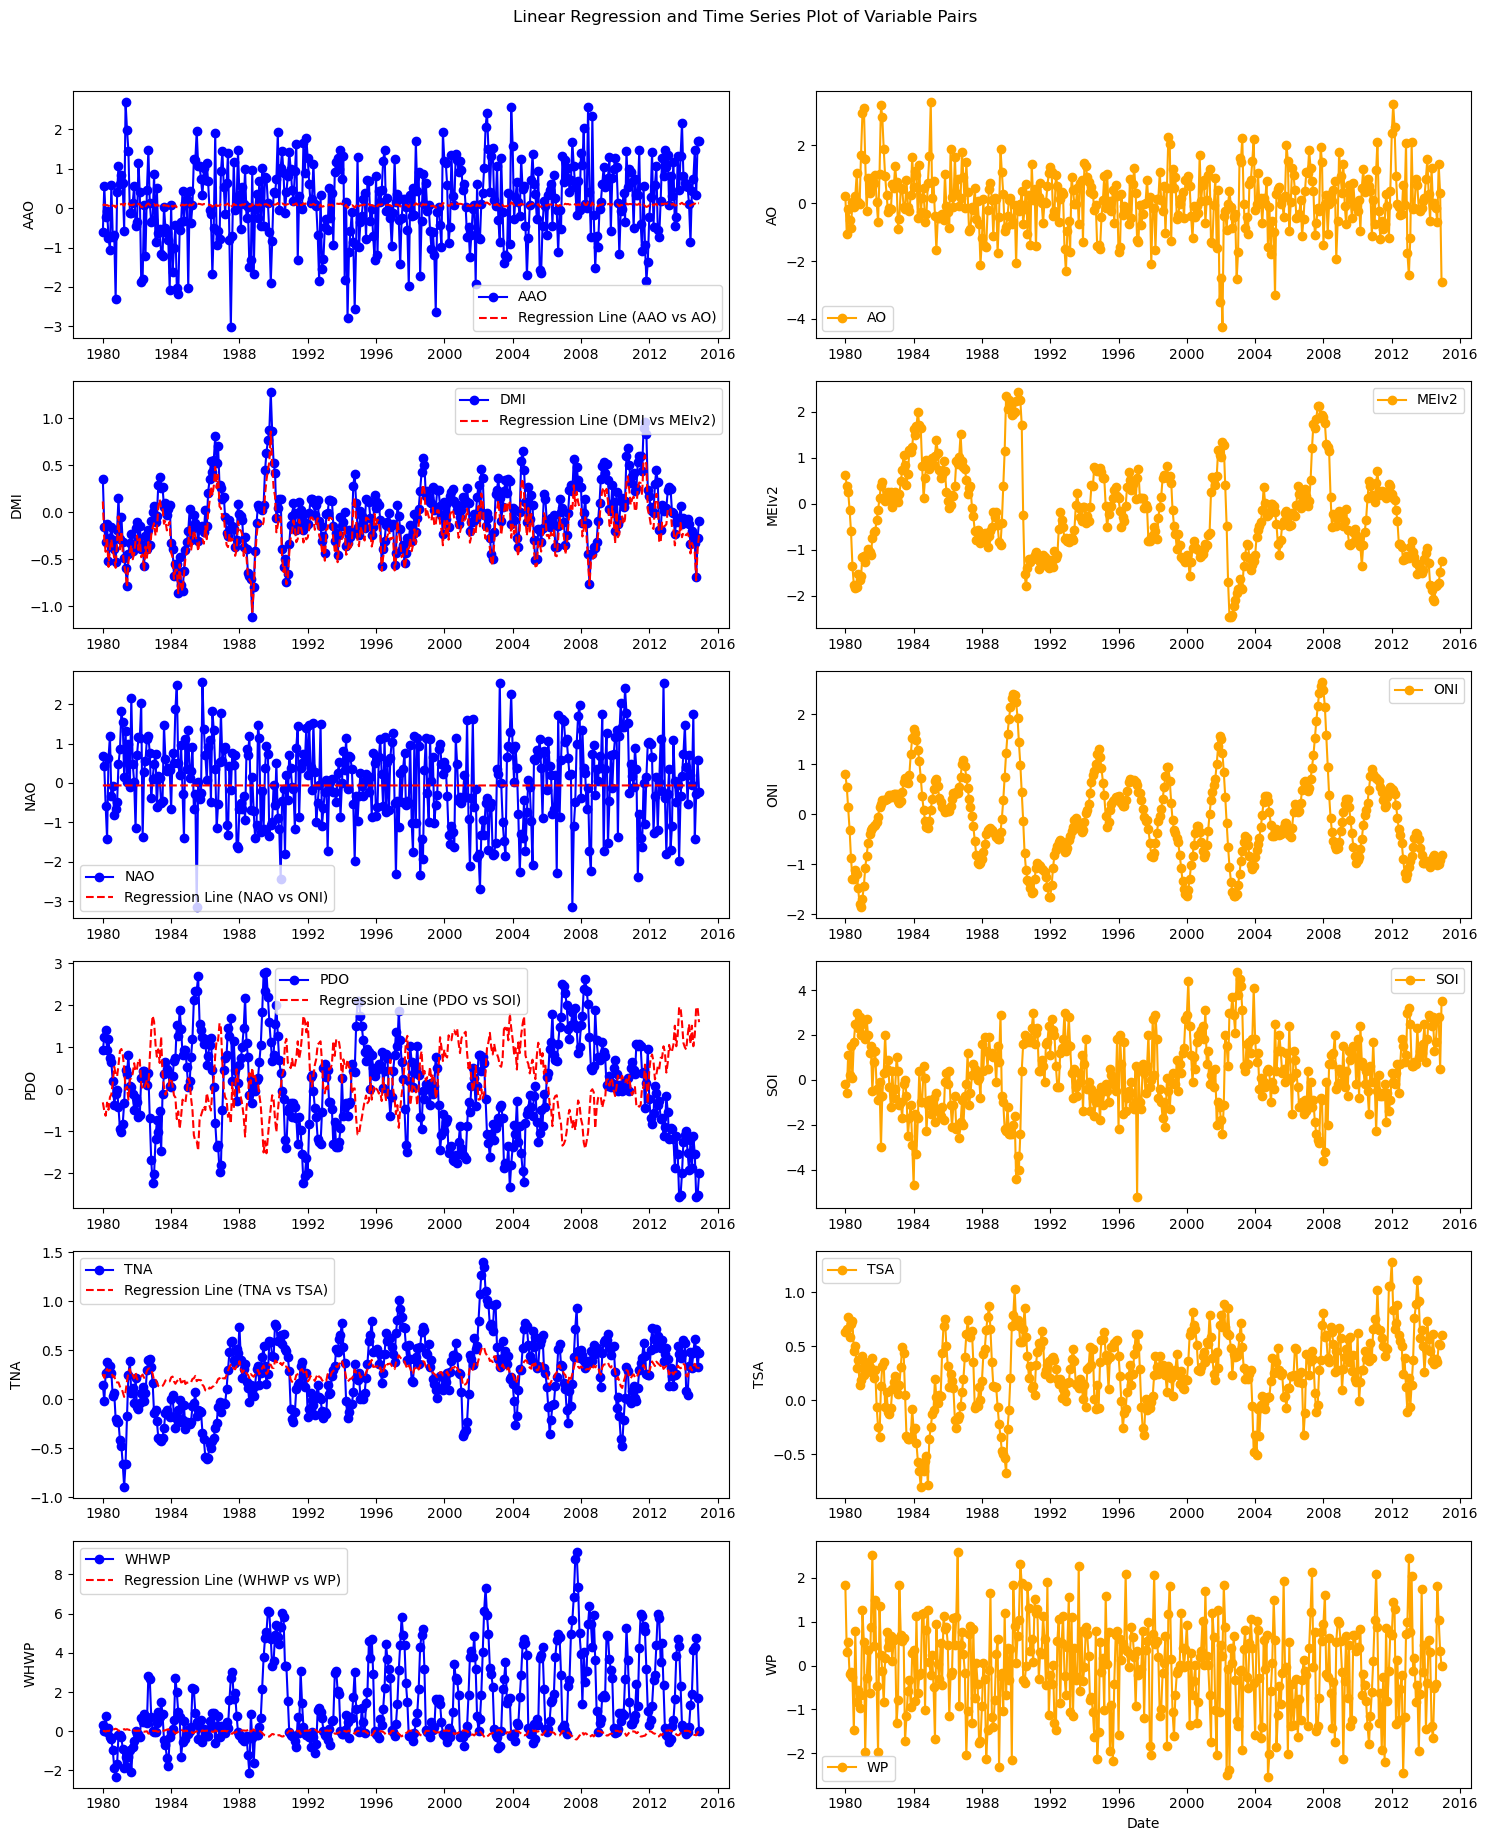

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the pairs of variables for regression
variable_pairs = [('AAO', 'AO'), ('DMI', 'MEIv2'), ('NAO', 'ONI'), ('PDO', 'SOI'), ('TNA', 'TSA'), ('WHWP', 'WP')]

# Create subplots
fig, axes = plt.subplots(nrows=len(variable_pairs), ncols=2, figsize=(15, 3 * len(variable_pairs)))

# Iterate through variable pairs
for i, (var1, var2) in enumerate(variable_pairs):
    # Plot individual time series
    axes[i, 0].plot(df['DATE'], df[var1], label=var1, marker='o', linestyle='-', color='blue')
    axes[i, 1].plot(df['DATE'], df[var2], label=var2, marker='o', linestyle='-', color='orange')

    # Perform linear regression
    model = LinearRegression()
    X = df[[var1]].values.reshape(-1, 1)
    y = df[var2].values
    model.fit(X, y)

    # Plot regression line
    x_range = df[var1].values.reshape(-1, 1)
    y_pred = model.predict(x_range)
    axes[i, 0].plot(df['DATE'], y_pred, label=f'Regression Line ({var1} vs {var2})', linestyle='--', color='red')
    
    axes[i, 0].set_ylabel(var1)
    axes[i, 1].set_ylabel(var2)
    axes[i, 0].legend()
    axes[i, 1].legend()

# Customize overall plot
plt.suptitle('Linear Regression and Time Series Plot of Variable Pairs', y=1.02)
plt.xlabel('Date')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# linear regression

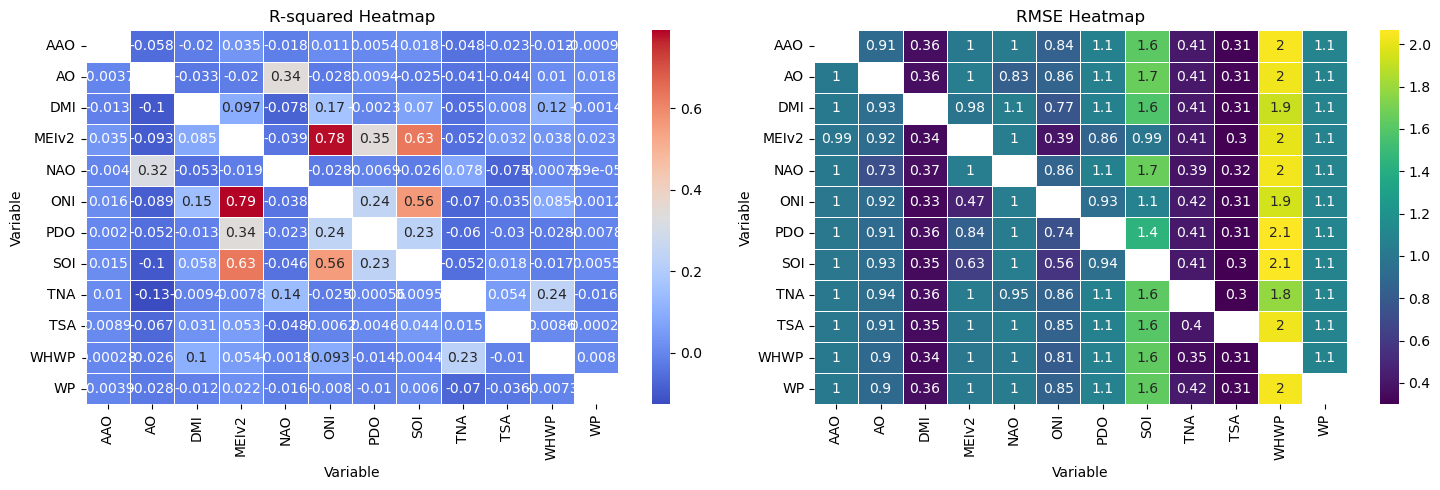

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for linear regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Create a DataFrame to store R-squared values
r2_df = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df = pd.DataFrame(index=variables, columns=variables)

# Perform linear regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for linear regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Fit a linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap
sns.heatmap(r2_df.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap
sns.heatmap(rmse_df.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#  Polynomial Regression

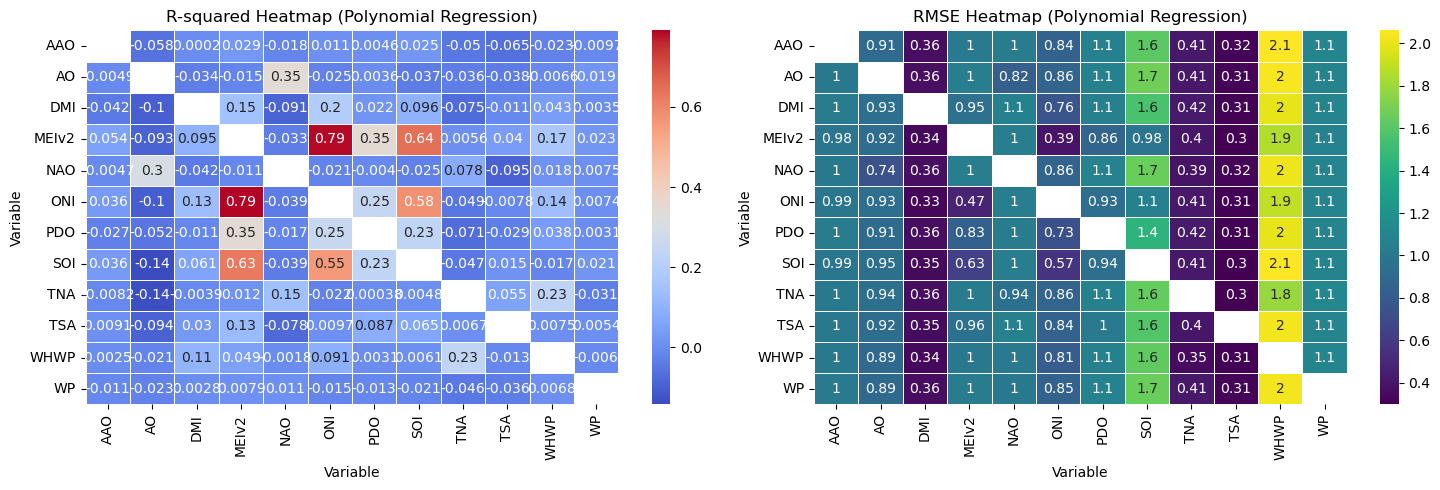

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for polynomial regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Degree of the polynomial
degree = 2  # You can adjust this value

# Create a DataFrame to store R-squared values
r2_df_poly = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_poly = pd.DataFrame(index=variables, columns=variables)

# Perform polynomial regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for polynomial regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Create polynomial features
            poly = PolynomialFeatures(degree=degree)
            X_poly_train = poly.fit_transform(X_train)
            X_poly_test = poly.transform(X_test)

            # Fit a polynomial regression model
            model = LinearRegression()
            model.fit(X_poly_train, y_train)

            # Make predictions
            y_pred = model.predict(X_poly_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_poly.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_poly.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for Polynomial Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for Polynomial Regression
sns.heatmap(r2_df_poly.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (Polynomial Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for Polynomial Regression
sns.heatmap(rmse_df_poly.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (Polynomial Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Ridge Regression

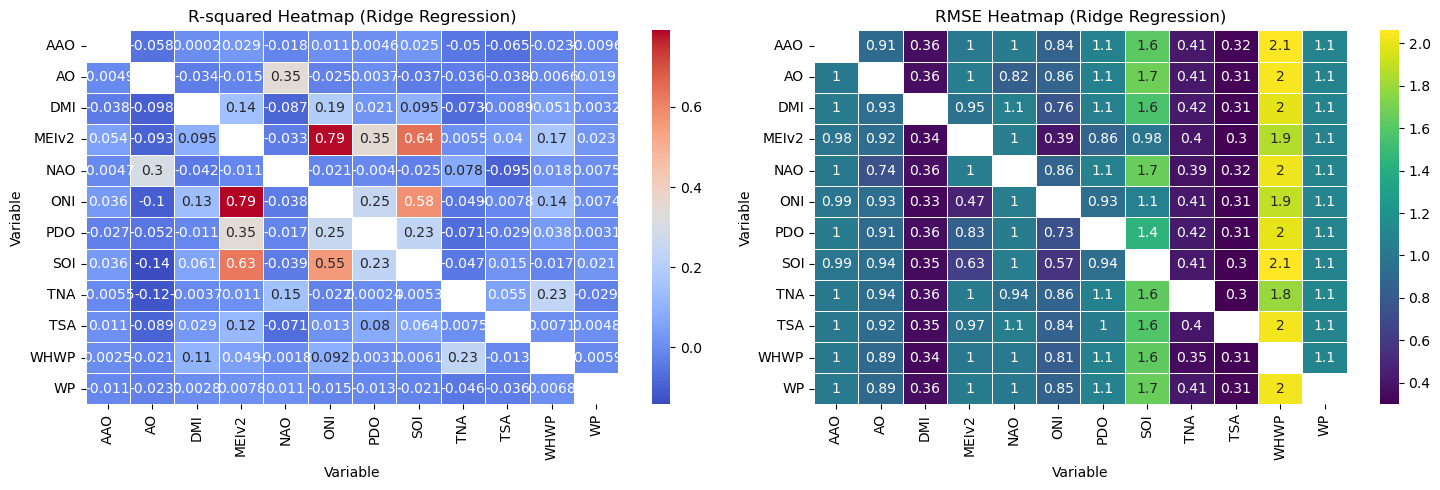

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for Ridge Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Degree of the polynomial
degree = 2  # You can adjust this value

# Regularization parameter (alpha) for Ridge Regression
alpha = 1.0  # You can adjust this value

# Create a DataFrame to store R-squared values
r2_df_ridge = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_ridge = pd.DataFrame(index=variables, columns=variables)

# Perform Ridge Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for Ridge Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Create polynomial features
            poly = PolynomialFeatures(degree=degree)
            X_poly_train = poly.fit_transform(X_train)
            X_poly_test = poly.transform(X_test)

            # Apply Ridge Regression
            model = Ridge(alpha=alpha)
            model.fit(X_poly_train, y_train)

            # Make predictions
            y_pred = model.predict(X_poly_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_ridge.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_ridge.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for Ridge Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for Ridge Regression
sns.heatmap(r2_df_ridge.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (Ridge Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for Ridge Regression
sns.heatmap(rmse_df_ridge.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (Ridge Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Lasso Regression

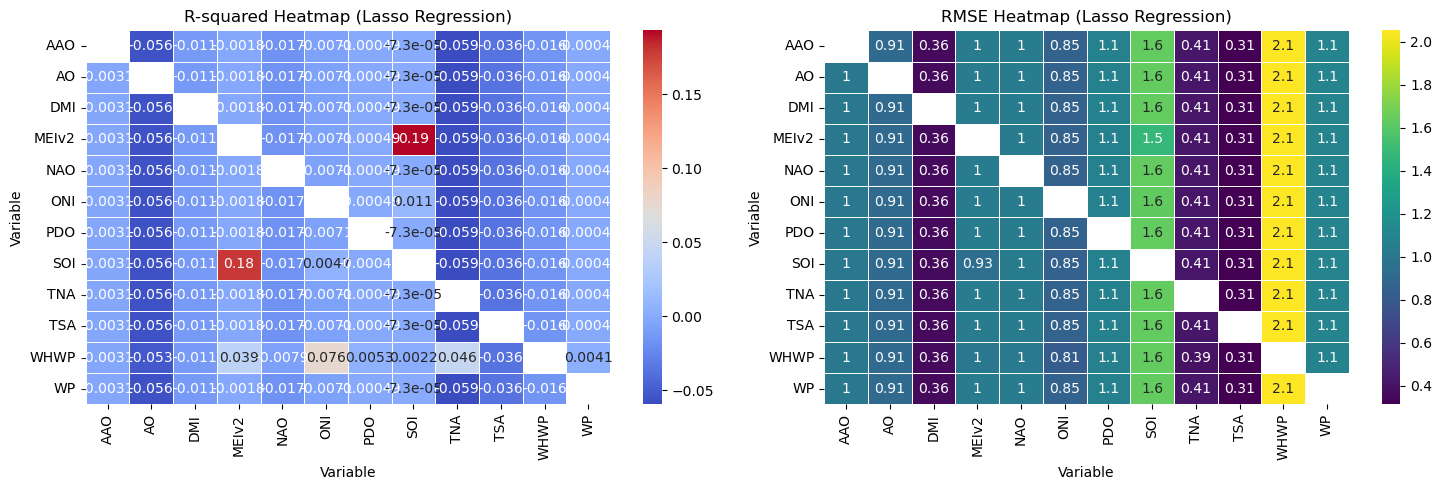

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for Lasso Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Degree of the polynomial
degree = 2  # You can adjust this value

# Regularization parameter (alpha) for Lasso Regression
alpha = 1.0  # You can adjust this value

# Create a DataFrame to store R-squared values
r2_df_lasso = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_lasso = pd.DataFrame(index=variables, columns=variables)

# Perform Lasso Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for Lasso Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Create polynomial features
            poly = PolynomialFeatures(degree=degree)
            X_poly_train = poly.fit_transform(X_train)
            X_poly_test = poly.transform(X_test)

            # Apply Lasso Regression
            model = Lasso(alpha=alpha)
            model.fit(X_poly_train, y_train)

            # Make predictions
            y_pred = model.predict(X_poly_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_lasso.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_lasso.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for Lasso Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for Lasso Regression
sns.heatmap(r2_df_lasso.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (Lasso Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for Lasso Regression
sns.heatmap(rmse_df_lasso.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (Lasso Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Elastic Net Regression

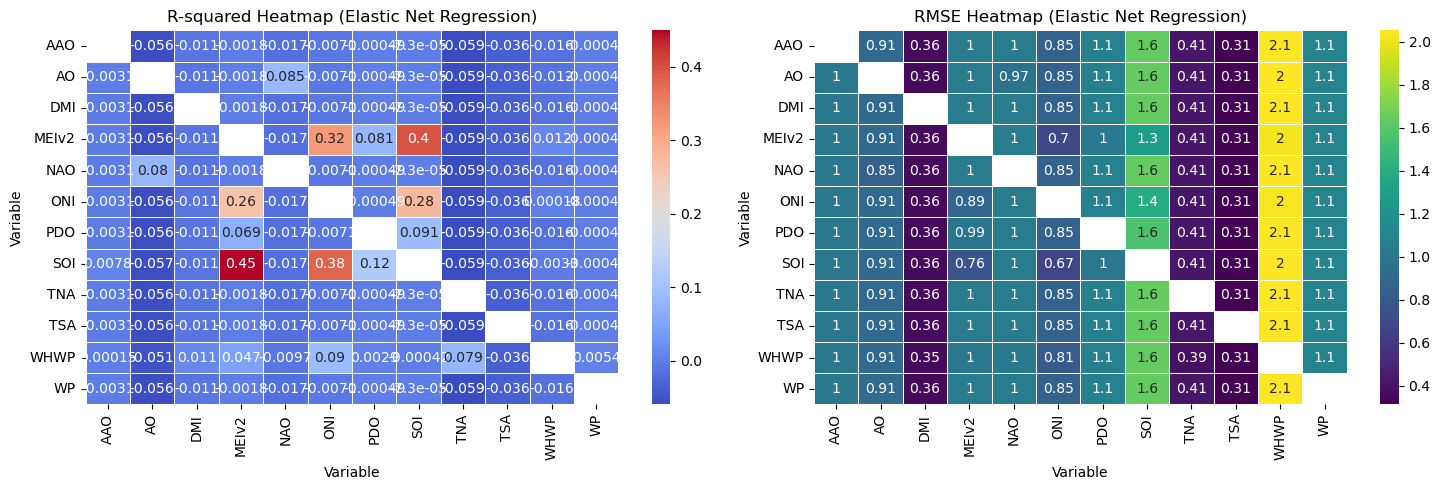

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for Elastic Net Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Degree of the polynomial
degree = 2  # You can adjust this value

# Regularization parameters (alpha and l1_ratio) for Elastic Net Regression
alpha = 1.0  # You can adjust this value
l1_ratio = 0.5  # You can adjust this value

# Create a DataFrame to store R-squared values
r2_df_elasticnet = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_elasticnet = pd.DataFrame(index=variables, columns=variables)

# Perform Elastic Net Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for Elastic Net Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Create polynomial features
            poly = PolynomialFeatures(degree=degree)
            X_poly_train = poly.fit_transform(X_train)
            X_poly_test = poly.transform(X_test)

            # Apply Elastic Net Regression
            model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
            model.fit(X_poly_train, y_train)

            # Make predictions
            y_pred = model.predict(X_poly_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_elasticnet.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_elasticnet.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for Elastic Net Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for Elastic Net Regression
sns.heatmap(r2_df_elasticnet.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (Elastic Net Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for Elastic Net Regression
sns.heatmap(rmse_df_elasticnet.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (Elastic Net Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Support Vector Regression 

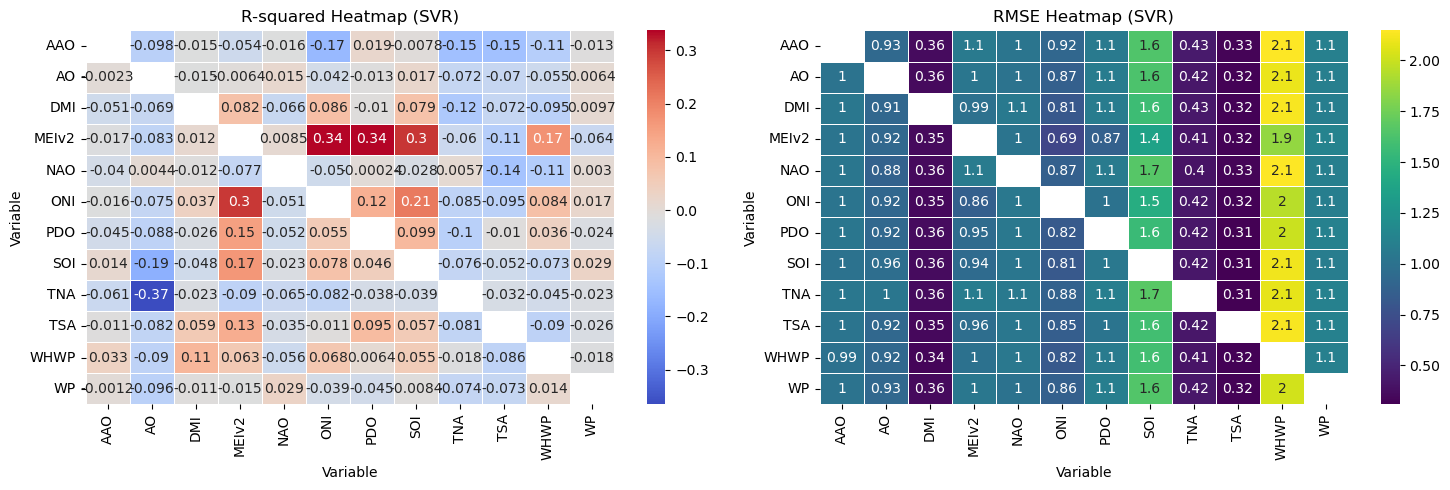

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for SVR
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Degree of the polynomial
degree = 2  # You can adjust this value

# Regularization parameter (C) for SVR
C = 1.0  # You can adjust this value

# Create a DataFrame to store R-squared values
r2_df_svr = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_svr = pd.DataFrame(index=variables, columns=variables)

# Perform SVR and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for SVR
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Create polynomial features
            poly = PolynomialFeatures(degree=degree)
            X_poly_train = poly.fit_transform(X_train)
            X_poly_test = poly.transform(X_test)

            # Standardize the features
            scaler = StandardScaler()
            X_poly_train_scaled = scaler.fit_transform(X_poly_train)
            X_poly_test_scaled = scaler.transform(X_poly_test)

            # Apply Support Vector Regression
            model = SVR(kernel='poly', degree=degree, C=C)
            model.fit(X_poly_train_scaled, y_train)

            # Make predictions
            y_pred = model.predict(X_poly_test_scaled)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_svr.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_svr.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for SVR
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for SVR
sns.heatmap(r2_df_svr.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (SVR)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for SVR
sns.heatmap(rmse_df_svr.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (SVR)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Decision Tree Regression

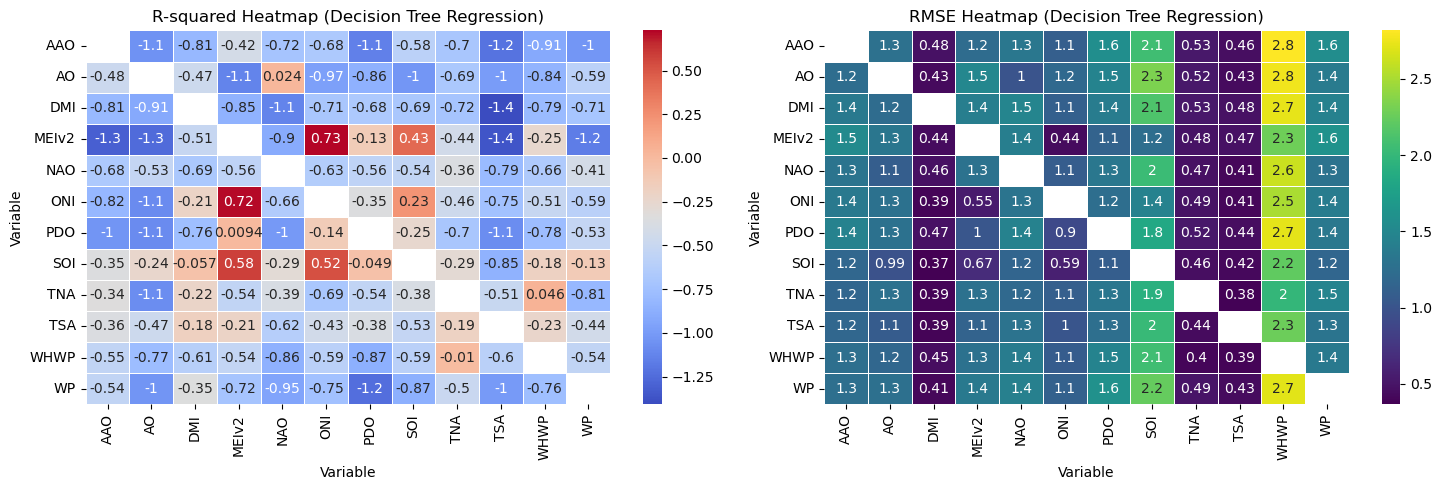

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for Decision Tree Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Create a DataFrame to store R-squared values
r2_df_decision_tree = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_decision_tree = pd.DataFrame(index=variables, columns=variables)

# Perform Decision Tree Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for Decision Tree Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Apply Decision Tree Regression
            model = DecisionTreeRegressor()
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_decision_tree.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_decision_tree.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for Decision Tree Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for Decision Tree Regression
sns.heatmap(r2_df_decision_tree.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (Decision Tree Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for Decision Tree Regression
sns.heatmap(rmse_df_decision_tree.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (Decision Tree Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Random Forest Regression

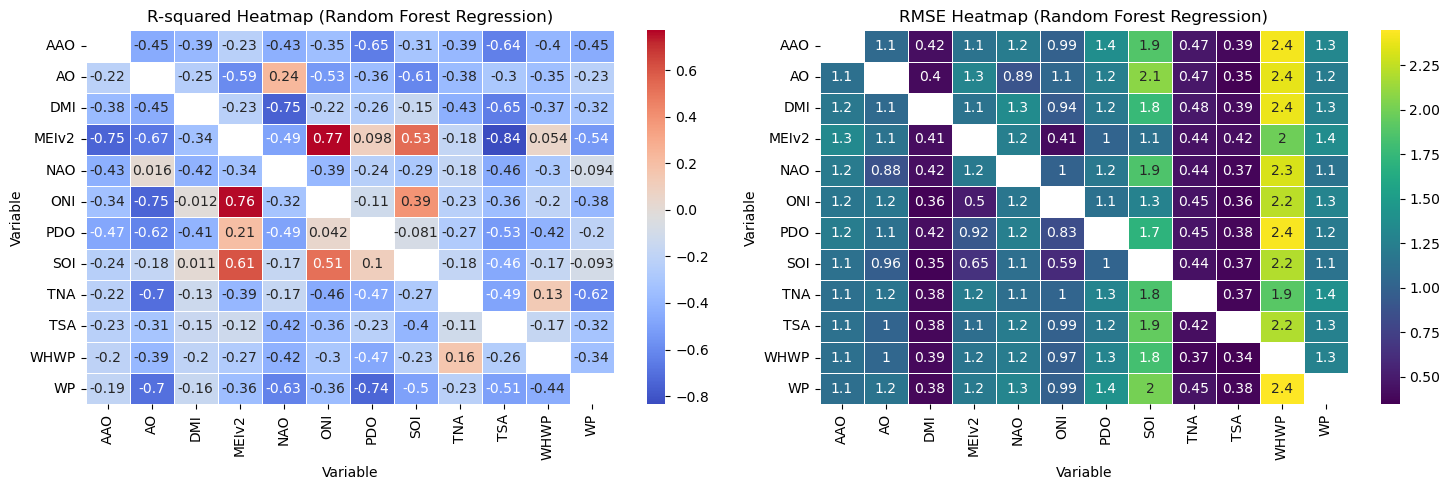

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for Random Forest Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Create a DataFrame to store R-squared values
r2_df_random_forest = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_random_forest = pd.DataFrame(index=variables, columns=variables)

# Perform Random Forest Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for Random Forest Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Apply Random Forest Regression
            model = RandomForestRegressor(n_estimators=100)  # You can adjust the number of estimators as needed
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_random_forest.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_random_forest.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for Random Forest Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for Random Forest Regression
sns.heatmap(r2_df_random_forest.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (Random Forest Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for Random Forest Regression
sns.heatmap(rmse_df_random_forest.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (Random Forest Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Gradient Boosting Regression

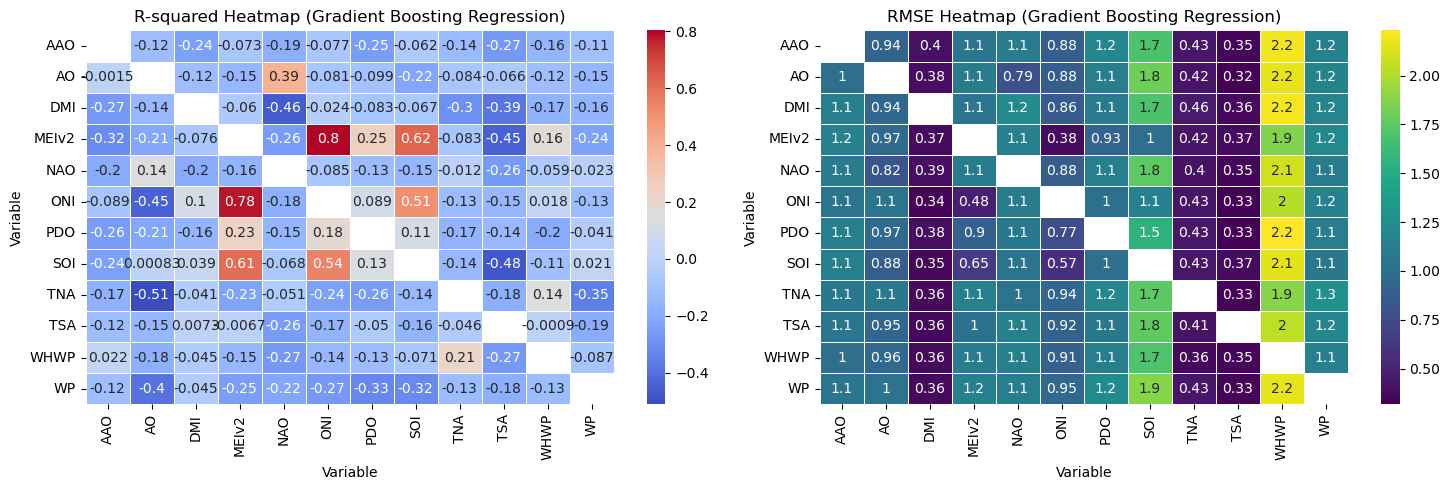

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for Gradient Boosting Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Create a DataFrame to store R-squared values
r2_df_gradient_boosting = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_gradient_boosting = pd.DataFrame(index=variables, columns=variables)

# Perform Gradient Boosting Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for Gradient Boosting Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Apply Gradient Boosting Regression
            model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # You can adjust parameters as needed
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_gradient_boosting.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_gradient_boosting.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for Gradient Boosting Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for Gradient Boosting Regression
sns.heatmap(r2_df_gradient_boosting.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (Gradient Boosting Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for Gradient Boosting Regression
sns.heatmap(rmse_df_gradient_boosting.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (Gradient Boosting Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#XGBoost Regression

In [12]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 393.8 kB/s eta 0:04:14
   ---------------------------------------- 0.1/99.8 MB 573.4 kB/s eta 0:02:54
   ---------------------------------------- 0.2/99.8 MB 952.6 kB/s eta 0:01:45
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.5/99.8 MB 1.7 MB/s eta 0:01:00
   ---------------------------------------- 1.0/99.8 MB 3.1 MB/s eta 0:00:32
   ---------------------------------------- 1.1/99.8 MB 3.1 MB/s eta 0:00:32
    --------------------------------------- 1.6/99.8 MB 4.0 MB/s eta 0:00:25
    --------------------------------------- 1.9/99.8 MB 4.3 MB/s eta 0:00:23
    --------------------------------------- 2.3/99.8 MB 4.6 MB/s eta 0:00:22
   - ---------

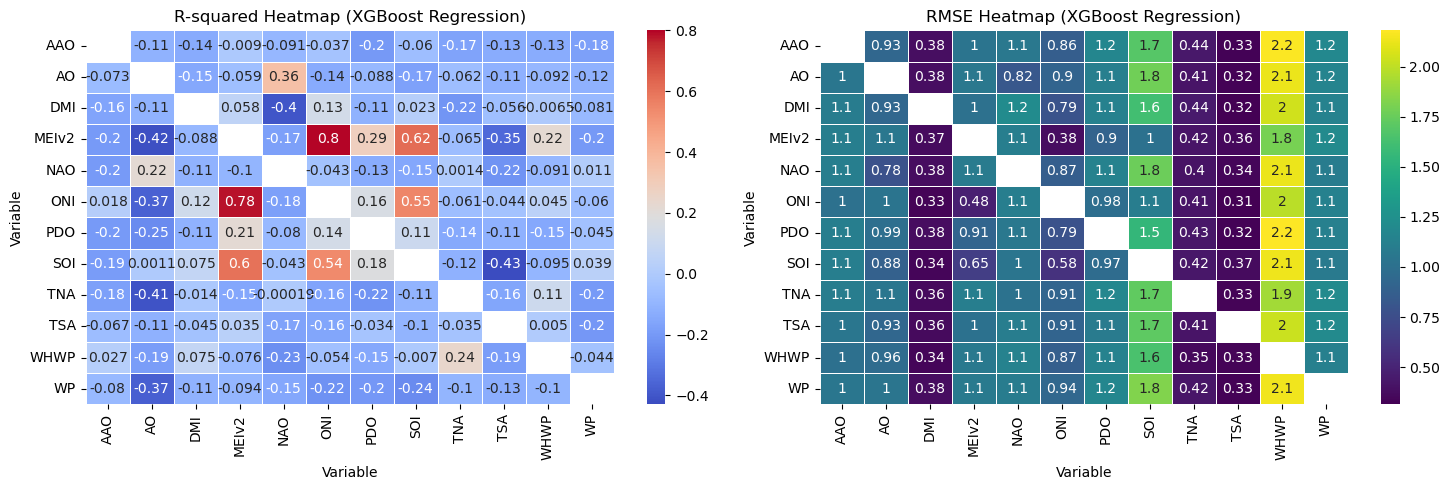

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for XGBoost Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Create a DataFrame to store R-squared values
r2_df_xgboost = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_xgboost = pd.DataFrame(index=variables, columns=variables)

# Perform XGBoost Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for XGBoost Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Apply XGBoost Regression
            model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)  # You can adjust parameters as needed
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_xgboost.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_xgboost.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for XGBoost Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for XGBoost Regression
sns.heatmap(r2_df_xgboost.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (XGBoost Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for XGBoost Regression
sns.heatmap(rmse_df_xgboost.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (XGBoost Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#LightGBM Regression

In [14]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 660.6 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.3 MB 991.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.3 MB 1.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 2.5 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.3 MB 3.3 MB/s eta 0:00:01
   --------------------------------- ------ 1.1/1.3 MB 4.5 MB/s eta 0:00:01
   ------------------------------------- -- 1.2/1.3 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 3.1 MB/s eta 0:00:00


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 336, number of used features: 1
[LightGBM] [Info] Start training from score 0.041863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

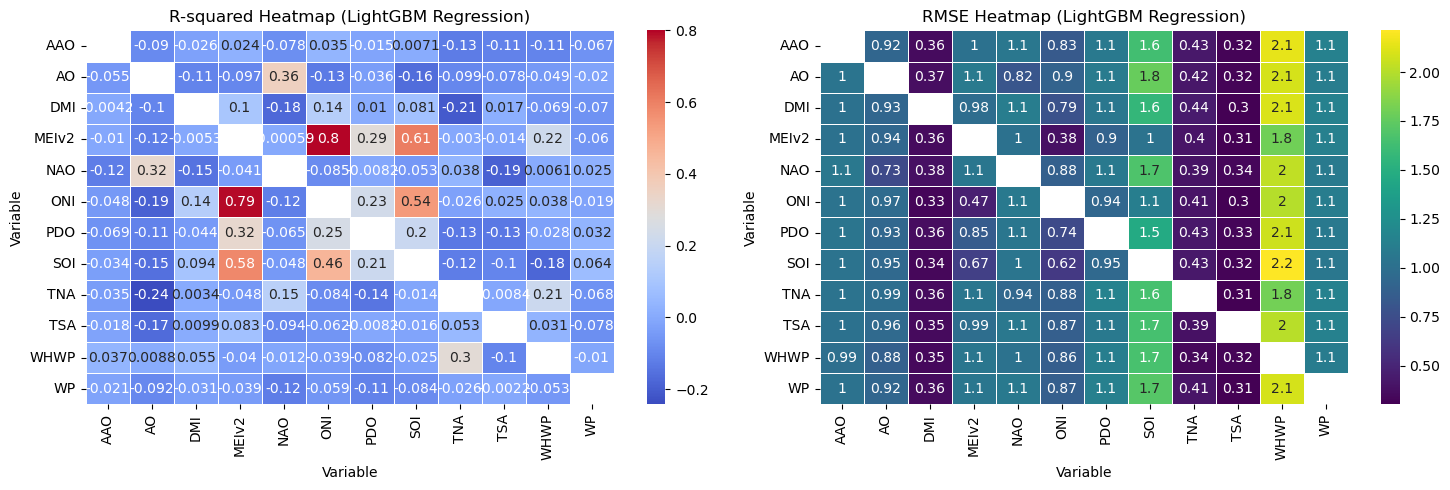

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for LightGBM Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Create a DataFrame to store R-squared values
r2_df_lightgbm = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_lightgbm = pd.DataFrame(index=variables, columns=variables)

# Perform LightGBM Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for LightGBM Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Apply LightGBM Regression
            model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)  # You can adjust parameters as needed
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_lightgbm.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_lightgbm.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for LightGBM Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for LightGBM Regression
sns.heatmap(r2_df_lightgbm.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (LightGBM Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for LightGBM Regression
sns.heatmap(rmse_df_lightgbm.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (LightGBM Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#CatBoost Regression

In [17]:
!pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.1 MB 656.4 kB/s eta 0:02:34
   ---------------------------------------- 0.1/101.1 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.2/101.1 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.4/101.1 MB 1.7 MB/s eta 0:00:59
   ---------------------------------------- 0.5/101.1 MB 2.1 MB/s eta 0:00:49
   ---------------------------------------- 0.8/101.1 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 1.1/101.1 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 1.1/101.1 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 1.8/101.1 MB 4.3 MB/s eta 0:00:23
    --------------------------------------- 1.9/101.1 MB 4.4 MB/s eta 0:00:23
   - -------------------------------------- 3.3/101.1 MB 6.6 MB/s eta 0:00:1

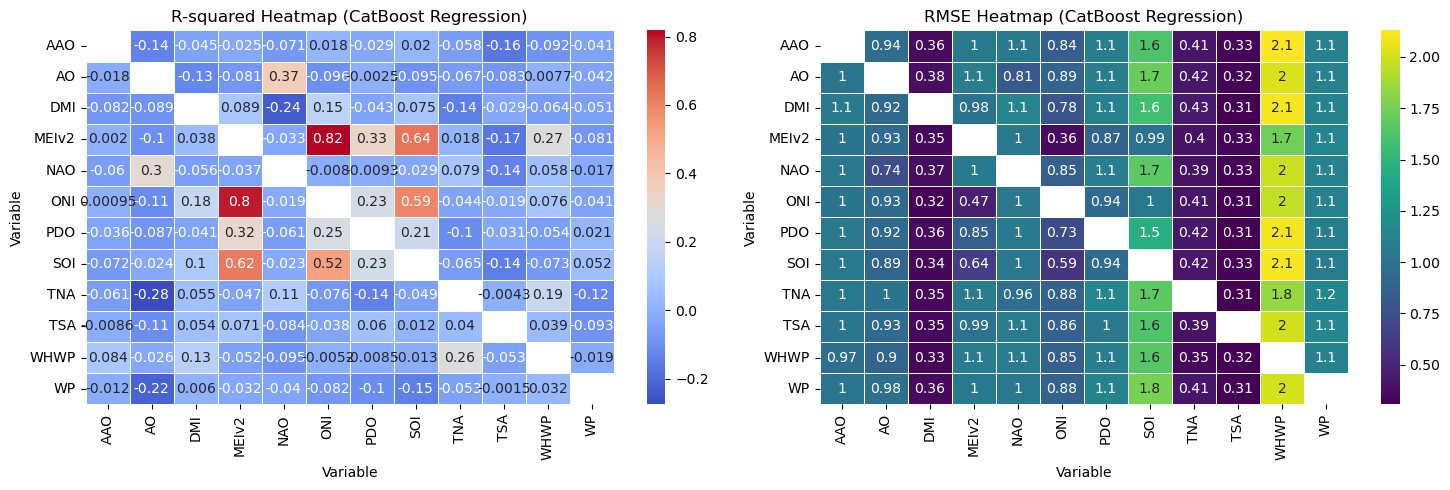

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for CatBoost Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Create a DataFrame to store R-squared values
r2_df_catboost = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_catboost = pd.DataFrame(index=variables, columns=variables)

# Perform CatBoost Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for CatBoost Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Apply CatBoost Regression
            model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, verbose=0)  # You can adjust parameters as needed
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_catboost.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_catboost.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for CatBoost Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for CatBoost Regression
sns.heatmap(r2_df_catboost.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (CatBoost Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for CatBoost Regression
sns.heatmap(rmse_df_catboost.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (CatBoost Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Neural Network Regression

In [20]:
!pip install tensorflow

   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/300.9 MB 1.8 MB/s eta 0:02:49
   ---------------------------------------- 0.2/300.9 MB 1.8 MB/s eta 0:02:51
   ---------------------------------------- 0.3/300.9 MB 1.8 MB/s eta 0:02:51
   ---------------------------------------- 0.4/300.9 MB 2.0 MB/s eta 0:02:30
   ---------------------------------------- 0.6/300.9 MB 2.6 MB/s eta 0:01:55
   ---------------------------------------- 0.9/300.9 MB 3.1 MB/s eta 0:01:39
   ---------------------------------------- 0.9/300.9 MB 3.2 MB/s eta 0:01:34
   ---------------------------------------- 1.0/300.9 MB 2.9 MB/s eta 0:01:45
   ---------------------------------------- 1.0/300.9 MB 2.9 MB/s eta 0:01:45
   ---------------------------------------- 2.1/300.9 MB 5.0 MB/s eta 0:01:00
   ---------------------------------------- 2.8/300.9 MB 5.8 MB/s eta 0:00:52






3/3 [==============================] - 0s 0s/step


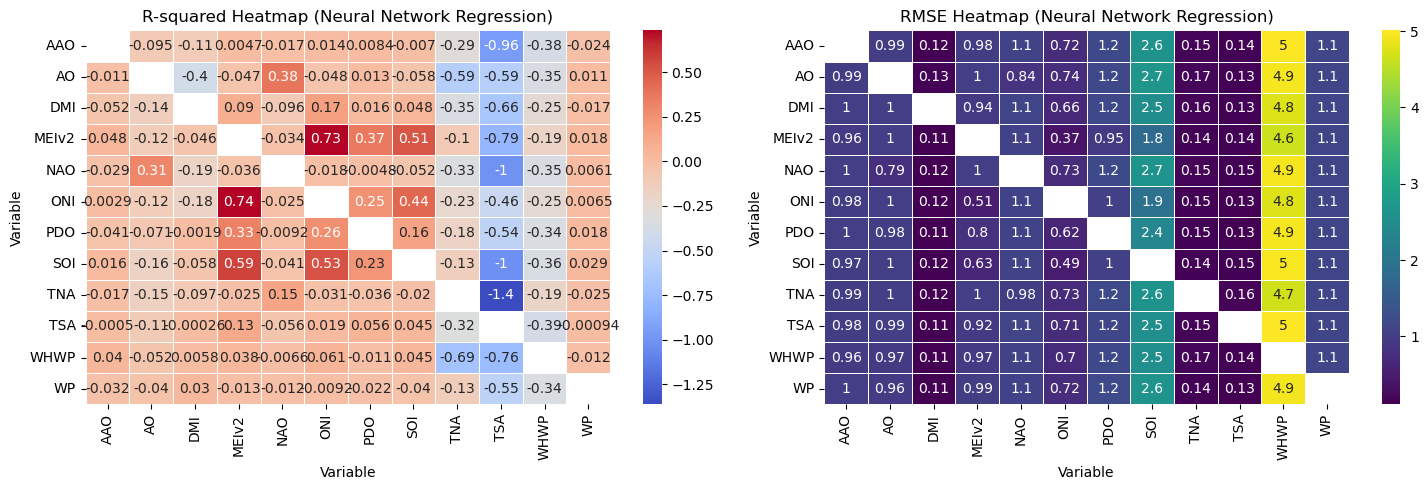

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for Neural Network Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Create a DataFrame to store R-squared values
r2_df_nn = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_nn = pd.DataFrame(index=variables, columns=variables)

# Perform Neural Network Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for Neural Network Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Standardize features
            scaler_X = StandardScaler()
            scaler_y = StandardScaler()

            X_train = scaler_X.fit_transform(X_train)
            y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

            X_test = scaler_X.transform(X_test)

            # Build the Neural Network model
            model = Sequential()
            model.add(Dense(64, input_dim=1, activation='relu'))
            model.add(Dense(32, activation='relu'))
            model.add(Dense(1, activation='linear'))

            # Compile the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Train the model
            model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

            # Make predictions
            y_pred = model.predict(X_test)

            # Reverse standardization for evaluation
            y_pred = scaler_y.inverse_transform(y_pred).ravel()
            y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_nn.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_nn.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for Neural Network Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for Neural Network Regression
sns.heatmap(r2_df_nn.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (Neural Network Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for Neural Network Regression
sns.heatmap(rmse_df_nn.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (Neural Network Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#K-Nearest Neighbors Regression (KNN Regression)

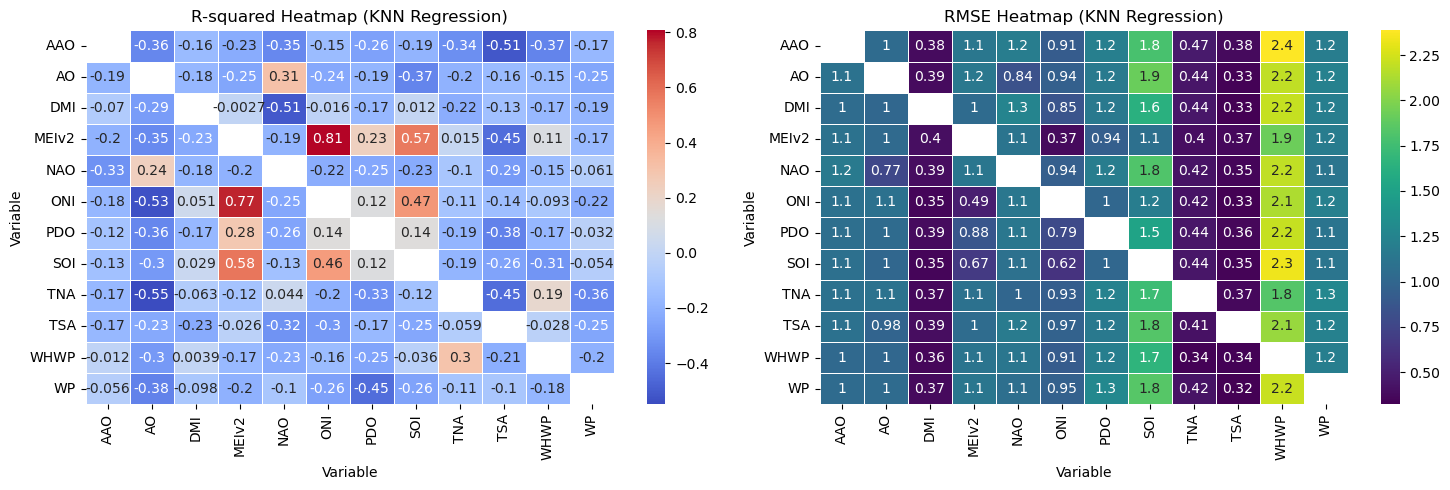

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for KNN Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Create a DataFrame to store R-squared values
r2_df_knn = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_knn = pd.DataFrame(index=variables, columns=variables)

# Perform KNN Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for KNN Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Apply KNN Regression
            k_neighbors = 5  # You can adjust the number of neighbors as needed
            model = KNeighborsRegressor(n_neighbors=k_neighbors)
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_knn.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_knn.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for KNN Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for KNN Regression
sns.heatmap(r2_df_knn.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (KNN Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for KNN Regression
sns.heatmap(rmse_df_knn.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (KNN Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Huber Regression

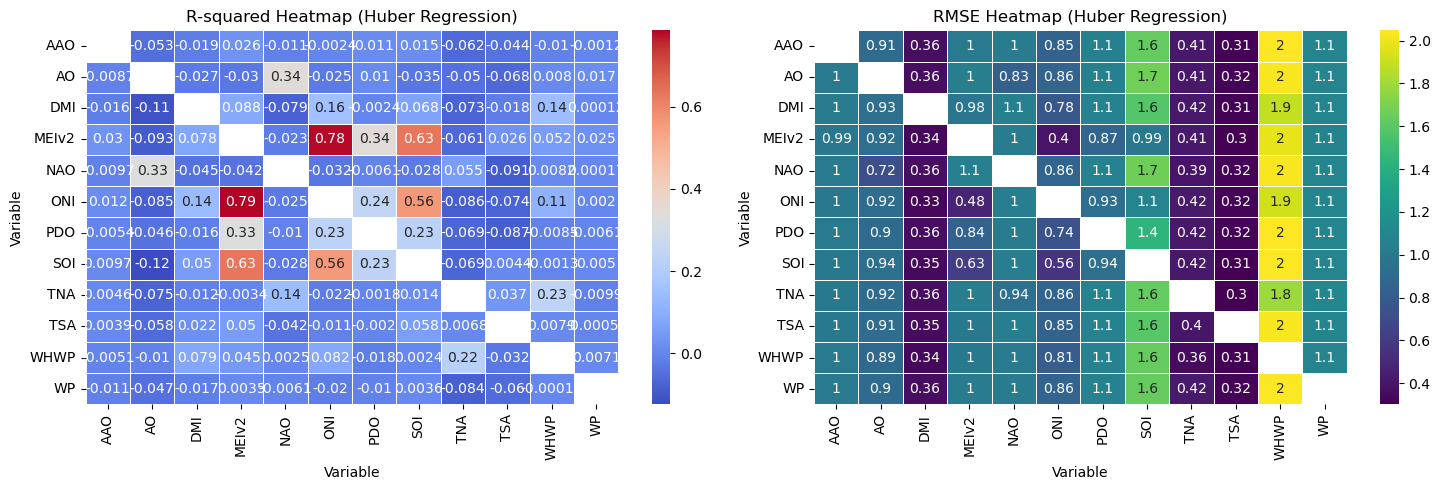

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for Huber Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Create a DataFrame to store R-squared values
r2_df_huber = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_huber = pd.DataFrame(index=variables, columns=variables)

# Perform Huber Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for Huber Regression
            X = df[var1].values.reshape(-1, 1)
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Apply Huber Regression
            epsilon = 1.35  # Huber loss parameter, you can adjust it based on your preference
            model = HuberRegressor(epsilon=epsilon)
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_huber.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_huber.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for Huber Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for Huber Regression
sns.heatmap(r2_df_huber.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (Huber Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for Huber Regression
sns.heatmap(rmse_df_huber.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (Huber Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [24]:
#Quantile Regression

C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


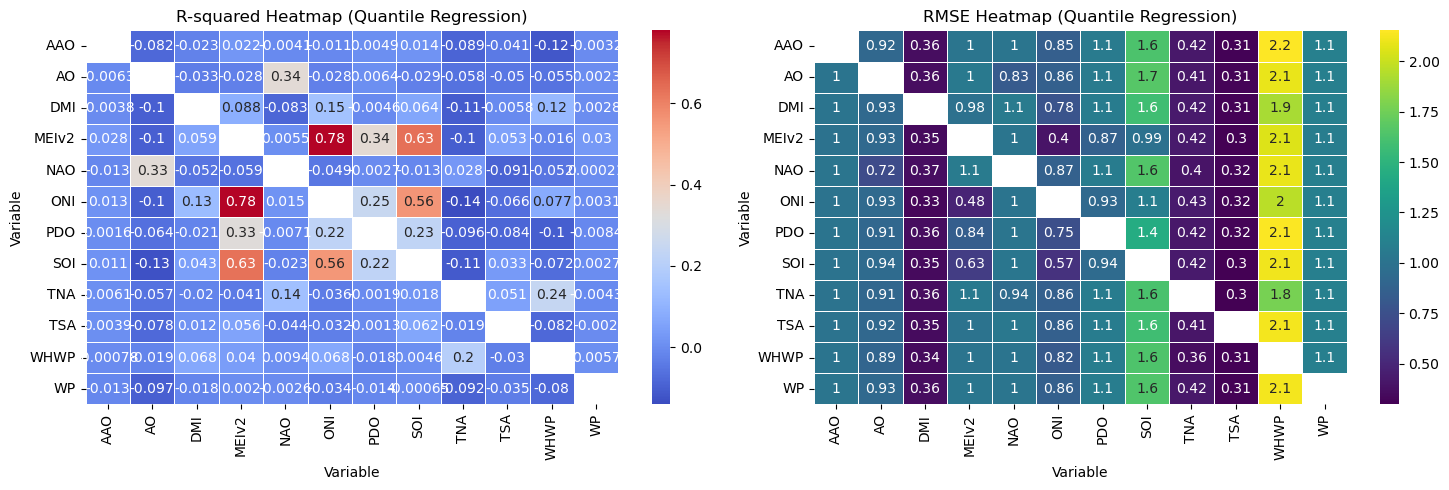

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Define the variables for Quantile Regression
variables = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Create a DataFrame to store R-squared values
r2_df_quantile = pd.DataFrame(index=variables, columns=variables)

# Create a DataFrame to store RMSE values
rmse_df_quantile = pd.DataFrame(index=variables, columns=variables)

# Perform Quantile Regression and calculate R-squared and RMSE
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Prepare data for Quantile Regression
            X = df[var1].values
            X = sm.add_constant(X)  # Add a constant term for the intercept
            y = df[var2].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Apply Quantile Regression
            tau = 0.5  # Quantile to be estimated, you can adjust it based on your preference
            model = sm.QuantReg(y_train, X_train)
            result = model.fit(q=tau)

            # Make predictions
            y_pred = result.predict(X_test)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r2_df_quantile.at[var1, var2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_df_quantile.at[var1, var2] = rmse

# Create heatmaps for R-squared and RMSE for Quantile Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R-squared heatmap for Quantile Regression
sns.heatmap(r2_df_quantile.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('R-squared Heatmap (Quantile Regression)')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Variable')

# RMSE heatmap for Quantile Regression
sns.heatmap(rmse_df_quantile.astype(float), annot=True, cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title('RMSE Heatmap (Quantile Regression)')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Bayesian Regression NEED TO DONE | CHECK Theano V.*

In [29]:
!pip install pymc3

     ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
     ---------------------------------------- 0.1/11.4 MB 1.1 MB/s eta 0:00:11
      --------------------------------------- 0.2/11.4 MB 1.7 MB/s eta 0:00:07
     - -------------------------------------- 0.3/11.4 MB 2.0 MB/s eta 0:00:06
     - -------------------------------------- 0.4/11.4 MB 2.2 MB/s eta 0:00:06
     -- ------------------------------------- 0.7/11.4 MB 3.1 MB/s eta 0:00:04
     --- ------------------------------------ 1.0/11.4 MB 4.1 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/11.4 MB 4.1 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/11.4 MB 5.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.8/11.4 MB 5.1 MB/s eta 0:00:02
     -------- ------------------------------- 2.4/11.4 MB 5.6 MB/s eta 0:00:02
     ---------- ----------------------------- 2.9/11.4 MB 6.6 MB/s eta 0:00:02
     -------------- ------------------------- 4.1/11.4 MB 7

In [32]:
pip install --upgrade theano


     ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
      --------------------------------------- 0.0/2.8 MB 245.8 kB/s eta 0:00:12
     - -------------------------------------- 0.1/2.8 MB 357.2 kB/s eta 0:00:08
     -- ------------------------------------- 0.2/2.8 MB 702.7 kB/s eta 0:00:04
     --- ------------------------------------ 0.3/2.8 MB 983.0 kB/s eta 0:00:03
     ----- ---------------------------------- 0.4/2.8 MB 1.3 MB/s eta 0:00:02
     ---------- ----------------------------- 0.7/2.8 MB 2.1 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/2.8 MB 2.7 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/2.8 MB 2.7 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/2.8 MB 2.7 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/2.8 MB 2.7 MB/s eta 0:00:01

In [34]:
!pip uninstall theano pymc3
!pip install theano pymc3


^C


In [37]:
!pip install --upgrade theano pymc3


  Using cached pymc3-3.11.5-py3-none-any.whl.metadata (14 kB)
  Using cached deprecat-2.1.1-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-1.22.1.zip (11.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
INFO: pip is looking at multiple versions of pymc3 to determine which version is compatible with other requirements. This could take a while.


In [ ]:
#Isotonic Regression

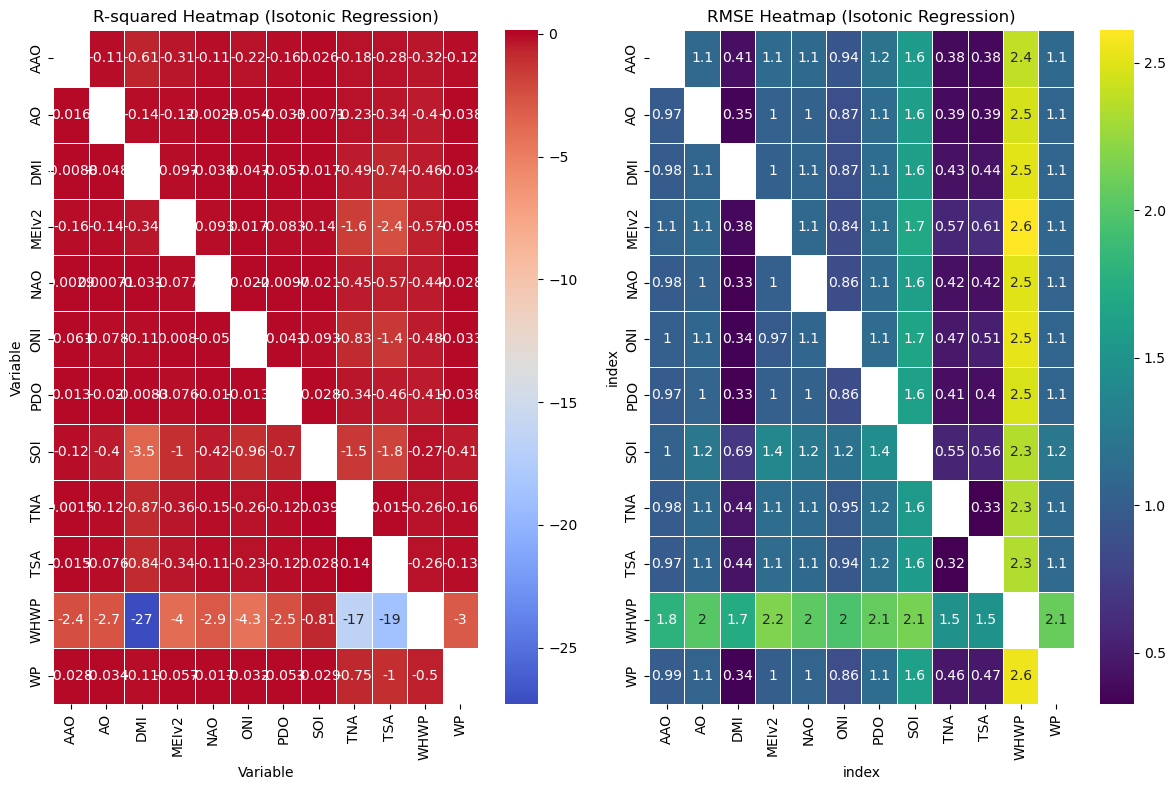

In [43]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Select the columns you want to perform isotonic regression on
columns_for_isotonic = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed

# Create DataFrames to store R-squared and RMSE values
r_squared_df = pd.DataFrame(index=columns_for_isotonic, columns=columns_for_isotonic)
rmse_df = pd.DataFrame(index=columns_for_isotonic, columns=columns_for_isotonic)

for col1 in columns_for_isotonic:
    for col2 in columns_for_isotonic:
        if col1 != col2:
            # Prepare data (impute NaN values)
            x = df['DATE'].values
            y1 = df[col1].values
            y2 = df[col2].values

            # Impute NaN values
            y1 = imputer.fit_transform(y1.reshape(-1, 1)).flatten()
            y2 = imputer.fit_transform(y2.reshape(-1, 1)).flatten()

            # Apply isotonic regression
            ir = IsotonicRegression(out_of_bounds='clip')
            y_ir = ir.fit_transform(x, y1)

            # Calculate R-squared
            r_squared = r2_score(y2, y_ir)
            r_squared_df.at[col1, col2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y2, y_ir, squared=False)
            rmse_df.at[col1, col2] = rmse

# Create a heatmap for R-squared values
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.heatmap(r_squared_df.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('R-squared Heatmap (Isotonic Regression)')
plt.xlabel('Variable')
plt.ylabel('Variable')

# Create a heatmap for RMSE values
plt.subplot(1, 2, 2)
sns.heatmap(rmse_df.astype(float), annot=True, cmap='viridis', linewidths=0.5)
plt.title('RMSE Heatmap (Isotonic Regression)')
plt.xlabel('index')
plt.ylabel('index')

plt.tight_layout()
plt.show()


In [ ]:
#Generalized Additive Models

In [44]:
!pip install pygam


     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 330.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 295.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/522.0 kB ? eta -:--:--
   --- ------------------------------------ 41.0/522.0 kB 1.9 MB/s eta 0:00:01
   ------------- -------------------------- 174.1/522.0 kB 2.6 MB/s eta 0:00:01
   ----------------------- ---------------- 307.2/522.0 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------  512.0/522.0 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------  512.0/522.0 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 522.0/522.0 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:-

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.


In [ ]:
#Principal Component Regression

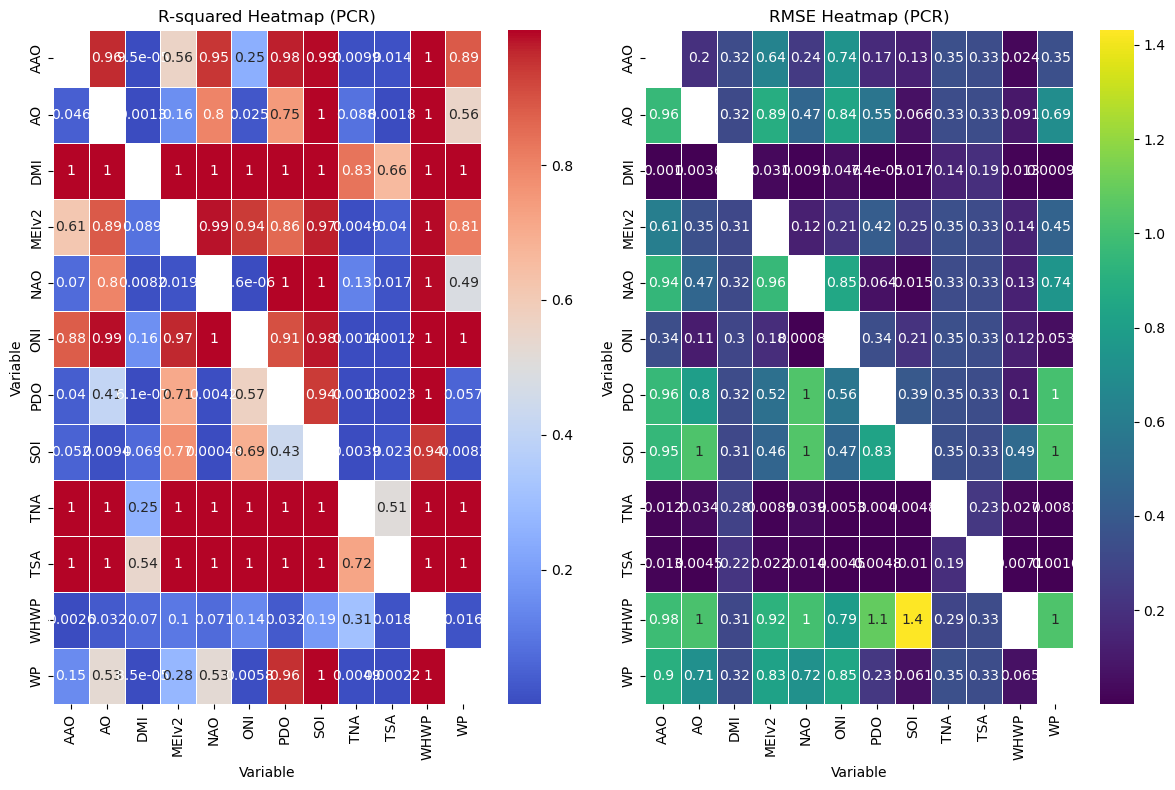

In [45]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Select the columns you want to perform PCR on
columns_for_pcr = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed

# Create DataFrames to store R-squared and RMSE values
r_squared_df = pd.DataFrame(index=columns_for_pcr, columns=columns_for_pcr)
rmse_df = pd.DataFrame(index=columns_for_pcr, columns=columns_for_pcr)

for col1 in columns_for_pcr:
    for col2 in columns_for_pcr:
        if col1 != col2:
            # Prepare data (impute NaN values)
            x = df['DATE'].values
            y1 = df[col1].values
            y2 = df[col2].values

            # Impute NaN values
            y1 = imputer.fit_transform(y1.reshape(-1, 1)).flatten()
            y2 = imputer.fit_transform(y2.reshape(-1, 1)).flatten()

            # Combine features for PCR
            features = np.column_stack((y1, y2))

            # Apply PCA
            pca = PCA(n_components=1)
            principal_components = pca.fit_transform(features)

            # Use principal component as predictor
            x_pcr = principal_components
            y_pcr = y2

            # Fit Linear Regression model
            lr = LinearRegression().fit(x_pcr.reshape(-1, 1), y_pcr)

            # Predict using Linear Regression
            y_pred = lr.predict(x_pcr.reshape(-1, 1))

            # Calculate R-squared
            r_squared = r2_score(y_pcr, y_pred)
            r_squared_df.at[col1, col2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y_pcr, y_pred, squared=False)
            rmse_df.at[col1, col2] = rmse

# Create a heatmap for R-squared values
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.heatmap(r_squared_df.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('R-squared Heatmap (PCR)')
plt.xlabel('Variable')
plt.ylabel('Variable')

# Create a heatmap for RMSE values
plt.subplot(1, 2, 2)
sns.heatmap(rmse_df.astype(float), annot=True, cmap='viridis', linewidths=0.5)
plt.title('RMSE Heatmap (PCR)')
plt.xlabel('Variable')
plt.ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Kernel Ridge Regression

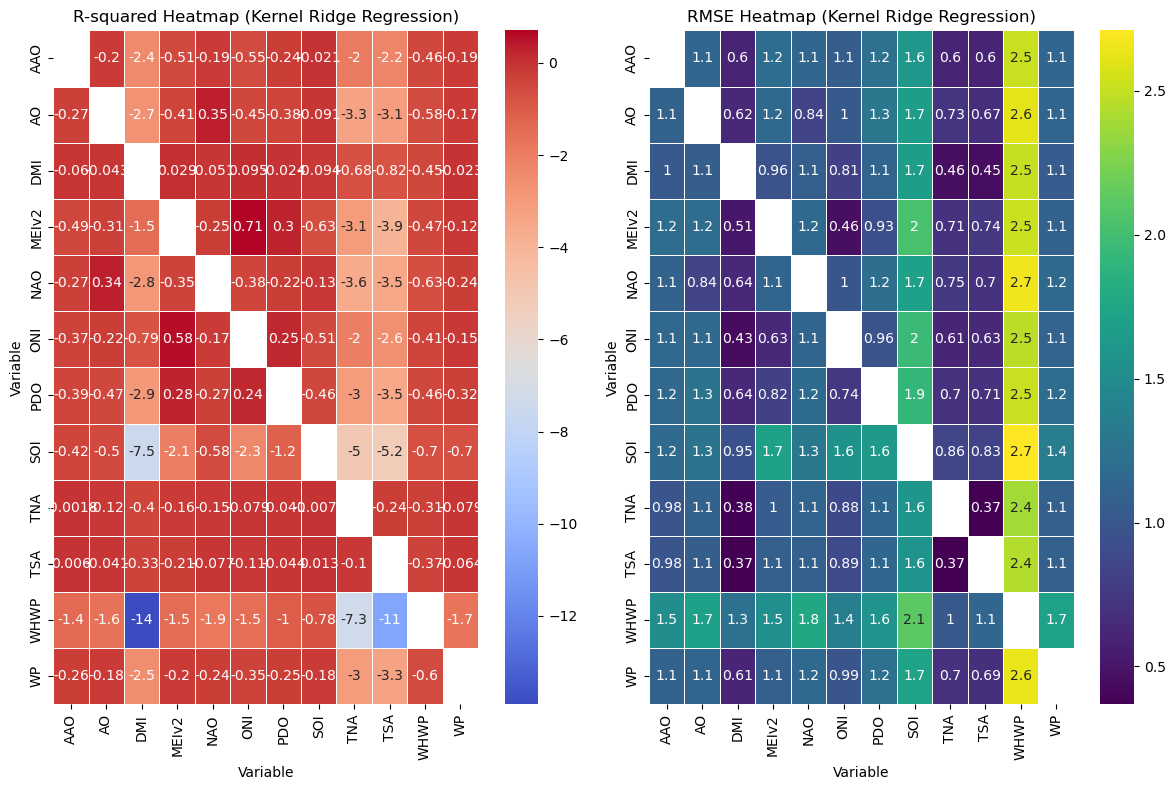

In [46]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Select the columns you want to perform Kernel Ridge Regression on
columns_for_krr = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed

# Create DataFrames to store R-squared and RMSE values
r_squared_df = pd.DataFrame(index=columns_for_krr, columns=columns_for_krr)
rmse_df = pd.DataFrame(index=columns_for_krr, columns=columns_for_krr)

for col1 in columns_for_krr:
    for col2 in columns_for_krr:
        if col1 != col2:
            # Prepare data (impute NaN values)
            x = df['DATE'].values
            y1 = df[col1].values
            y2 = df[col2].values

            # Impute NaN values
            y1 = imputer.fit_transform(y1.reshape(-1, 1)).flatten()
            y2 = imputer.fit_transform(y2.reshape(-1, 1)).flatten()

            # Use RBF kernel for Kernel Ridge Regression
            krr = KernelRidge(kernel='rbf')
            krr.fit(x.reshape(-1, 1), y1)

            # Predict using Kernel Ridge Regression
            y_pred = krr.predict(x.reshape(-1, 1))

            # Calculate R-squared
            r_squared = r2_score(y2, y_pred)
            r_squared_df.at[col1, col2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y2, y_pred, squared=False)
            rmse_df.at[col1, col2] = rmse

# Create a heatmap for R-squared values
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.heatmap(r_squared_df.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('R-squared Heatmap (Kernel Ridge Regression)')
plt.xlabel('Variable')
plt.ylabel('Variable')

# Create a heatmap for RMSE values
plt.subplot(1, 2, 2)
sns.heatmap(rmse_df.astype(float), annot=True, cmap='viridis', linewidths=0.5)
plt.title('RMSE Heatmap (Kernel Ridge Regression)')
plt.xlabel('Variable')
plt.ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Gaussian Process Regression

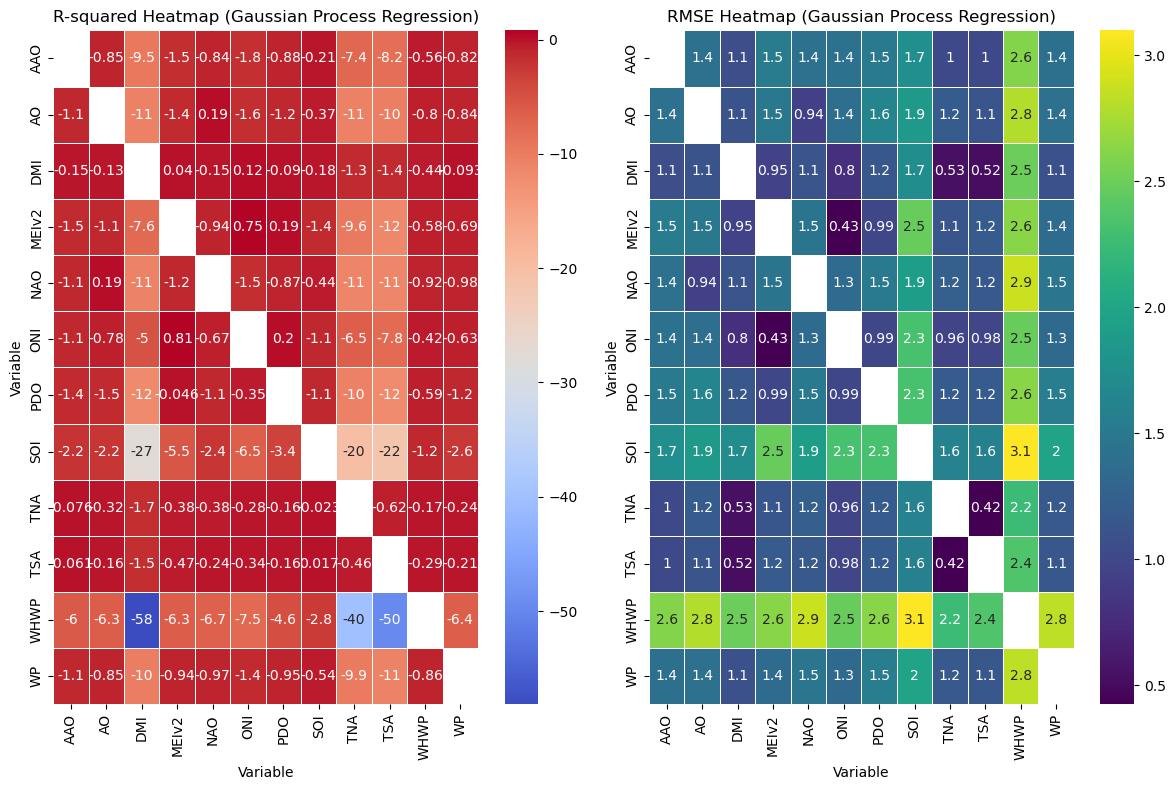

In [48]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Select the columns you want to perform Gaussian Process Regression on
columns_for_gpr = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed

# Create DataFrames to store R-squared and RMSE values
r_squared_df = pd.DataFrame(index=columns_for_gpr, columns=columns_for_gpr)
rmse_df = pd.DataFrame(index=columns_for_gpr, columns=columns_for_gpr)

# Convert dates to numerical representation (days since a reference date)
df['NUM_DATE'] = (df['DATE'] - df['DATE'].min()).dt.days

for col1 in columns_for_gpr:
    for col2 in columns_for_gpr:
        if col1 != col2:
            # Prepare data (impute NaN values)
            x = df['NUM_DATE'].values  # Use numerical representation of dates
            y1 = df[col1].values
            y2 = df[col2].values

            # Impute NaN values
            y1 = imputer.fit_transform(y1.reshape(-1, 1)).flatten()
            y2 = imputer.fit_transform(y2.reshape(-1, 1)).flatten()

            # Use Gaussian Process Regression with RBF kernel
            kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
            gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=0)
            gpr.fit(x.reshape(-1, 1), y1)

            # Predict using Gaussian Process Regression
            y_pred, _ = gpr.predict(x.reshape(-1, 1), return_std=True)

            # Calculate R-squared
            r_squared = r2_score(y2, y_pred)
            r_squared_df.at[col1, col2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y2, y_pred, squared=False)
            rmse_df.at[col1, col2] = rmse

# Create a heatmap for R-squared values
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.heatmap(r_squared_df.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('R-squared Heatmap (Gaussian Process Regression)')
plt.xlabel('Variable')
plt.ylabel('Variable')

# Create a heatmap for RMSE values
plt.subplot(1, 2, 2)
sns.heatmap(rmse_df.astype(float), annot=True, cmap='viridis', linewidths=0.5)
plt.title('RMSE Heatmap (Gaussian Process Regression)')
plt.xlabel('Variable')
plt.ylabel('Variable')

plt.tight_layout()
plt.show()


In [ ]:
#Gaussian Process Regression with RBF kernel

In [59]:
!pip install mord

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9898 sha256=a83c899d228521bc59ff781d9f3f2c63af191da68b3900ff9f48fd298d87e374
  Stored in directory: c:\users\subhadeep maishal\appdata\local\pip\cache\wheels\d1\fc\57\f2a2ad4ed0491ab6d5bb8642a90f1da9469397641e914743da
Successfully built mord


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'C:\Users\Subhadeep Maishal\Music\JUP\test_data\CBN_INPUT.csv'
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Select the columns you want to perform Gaussian Process Regression on
columns_for_gpr = ['AAO', 'AO', 'DMI', 'MEIv2', 'NAO', 'ONI', 'PDO', 'SOI', 'TNA', 'TSA', 'WHWP', 'WP']

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed

# Create DataFrames to store R-squared and RMSE values
r_squared_df = pd.DataFrame(index=columns_for_gpr, columns=columns_for_gpr)
rmse_df = pd.DataFrame(index=columns_for_gpr, columns=columns_for_gpr)

for col1 in columns_for_gpr:
    for col2 in columns_for_gpr:
        if col1 != col2:
            # Prepare data (impute NaN values)
            x = df['DATE'].values
            y1 = df[col1].values
            y2 = df[col2].values

            # Impute NaN values
            y1 = imputer.fit_transform(y1.reshape(-1, 1)).flatten()
            y2 = imputer.fit_transform(y2.reshape(-1, 1)).flatten()

            # Use Gaussian Process Regression with RBF kernel
            kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
            gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=0)

            # Ensure data types are appropriate
            x = x.astype(float)
            y1 = y1.astype(float)
            y2 = y2.astype(float)

            # Check and handle NaN values
            mask = ~np.isnan(y1) & ~np.isnan(y2)
            x = x[mask].reshape(-1, 1)
            y1 = y1[mask]
            y2 = y2[mask]

            gpr.fit(x, y1)

            # Predict using Gaussian Process Regression
            y_pred, _ = gpr.predict(x, return_std=True)

            # Calculate R-squared
            r_squared = r2_score(y2, y_pred)
            r_squared_df.at[col1, col2] = r_squared

            # Calculate RMSE
            rmse = mean_squared_error(y2, y_pred, squared=False)
            rmse_df.at[col1, col2] = rmse

# Create a heatmap for R-squared values
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.heatmap(r_squared_df.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('R-squared Heatmap (Gaussian Process Regression)')
plt.xlabel('Variable')
plt.ylabel('Variable')

# Create a heatmap for RMSE values
plt.subplot(1, 2, 2)
sns.heatmap(rmse_df.astype(float), annot=True, cmap='viridis', linewidths=0.5)
plt.title('RMSE Heatmap (Gaussian Process Regression)')
plt.xlabel('Variable')
plt.ylabel('Variable')

plt.tight_layout()
plt.show()
